In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

C:\Users\SASG\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading the dataset using pandas(Housing data)

In [3]:
data = pd.read_csv("Housing.csv")
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
print(f"Shape of dataframe: {data.shape}")

Shape of dataframe: (545, 13)


In [5]:
# Checking for the missing value in the dataset
print("Missing Data :\n", data.isna().sum())

Missing Data :
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Data Visualization

In [7]:
correlation = data.corr()
correlation

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


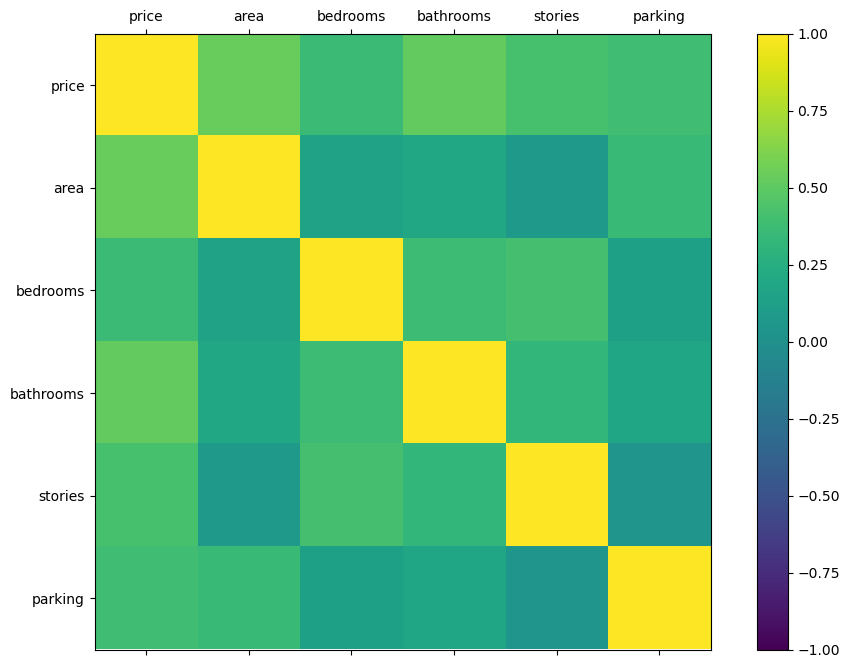

In [8]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)
cx=ax.matshow(correlation,vmax=1,vmin=-1)
fig.colorbar(cx)
ticks=np.arange(len(correlation))
labels=correlation.columns
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

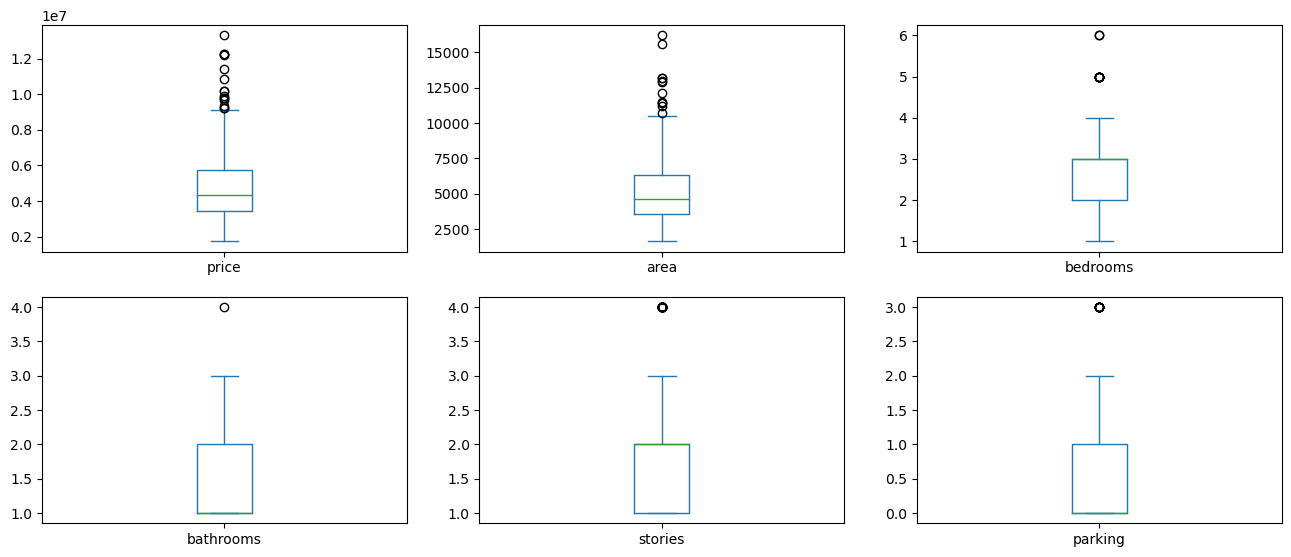

In [9]:
#Finding anomaly in the data
data.plot(kind='box',subplots=True,layout=(3,3),sharex=True,figsize=(16,10))
plt.show()

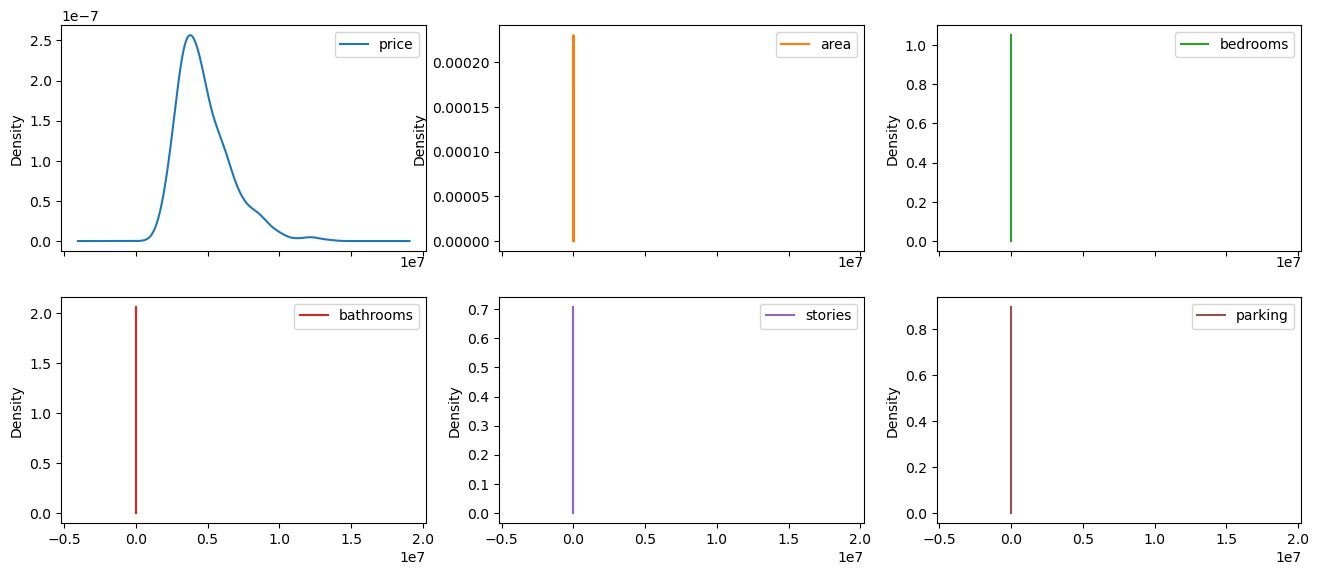

In [10]:
# density plot
data.plot(kind='density',subplots=True,layout=(3,3),sharex=True,figsize=(16,10))
plt.show()

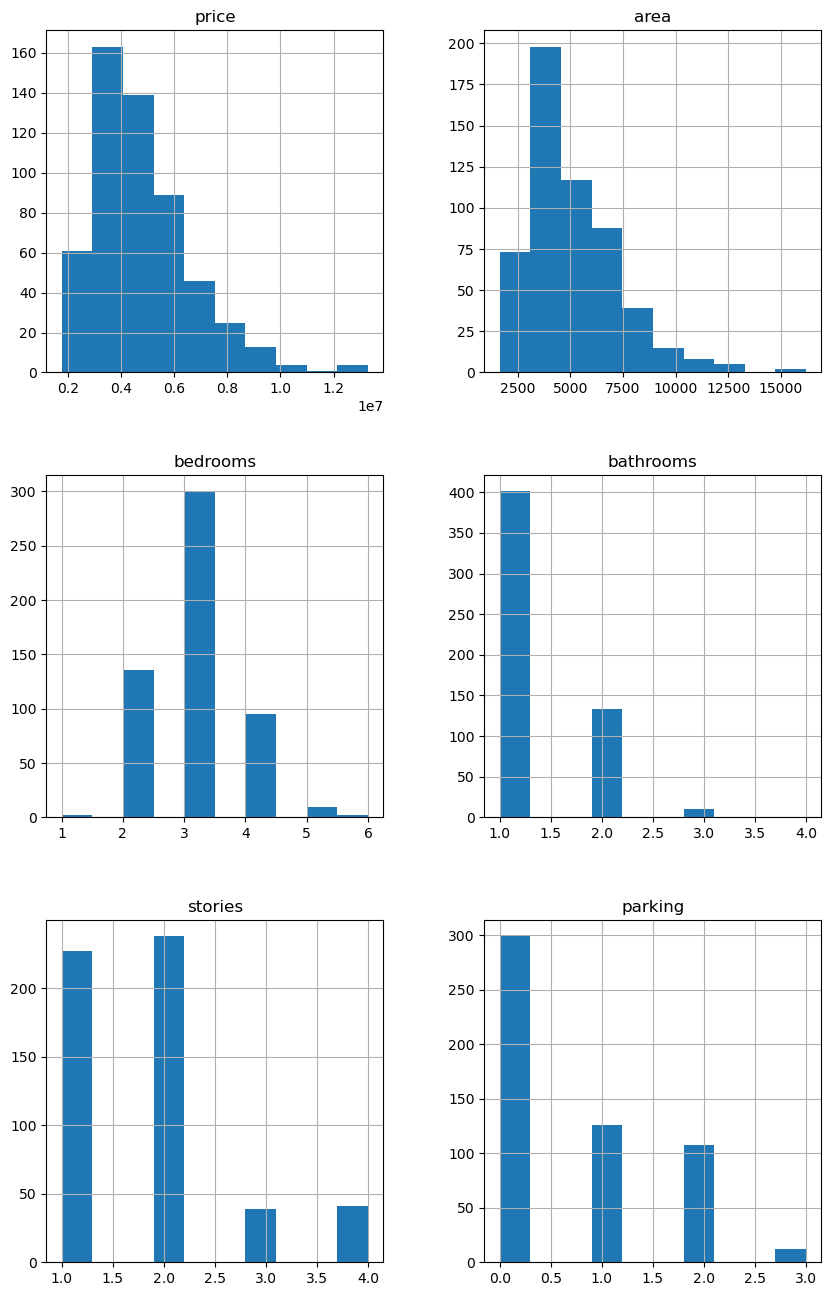

In [11]:
# histogram
data.hist(figsize=(10,16))
plt.show()

In [12]:
#splitting the data into feature and target variable
X=data.drop(["price"],axis=1)
Y=data["price"].values.reshape(-1,1)

In [13]:
# One hot encoding
X=pd.get_dummies(X).values

In [14]:
# Normalizing the data using Min Max Scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [15]:
X.shape, Y.shape

((545, 20), (545, 1))

In [16]:
# splitting the dataset into train and test set
X_train,X_test,Y_train,Y_test=tts(X_scaled,Y_scaled,test_size=0.30,random_state=10)

In [17]:
print(f"Training feature size: {X_train.shape}")

Training feature size: (381, 20)


In [18]:
print(f"Training target size: {Y_train.shape}")

Training target size: (381, 1)


In [19]:
print(f"Testing feature size: {X_test.shape}")

Testing feature size: (164, 20)


In [20]:
print(f"Test target size: {Y_test.shape}")

Test target size: (164, 1)


# Train the model

In [21]:
# training the model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

# Test the model

In [22]:
y_pred = model.predict(X_test)

In [23]:
print("Acccuracy: ",model.score(X_test,Y_test))

Acccuracy:  0.7407371209623983


In [24]:
print("Mean Squared Error: {:.4f}%".format(mean_squared_error(Y_test,y_pred)))

Mean Squared Error: 0.0057%
